# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn import metrics

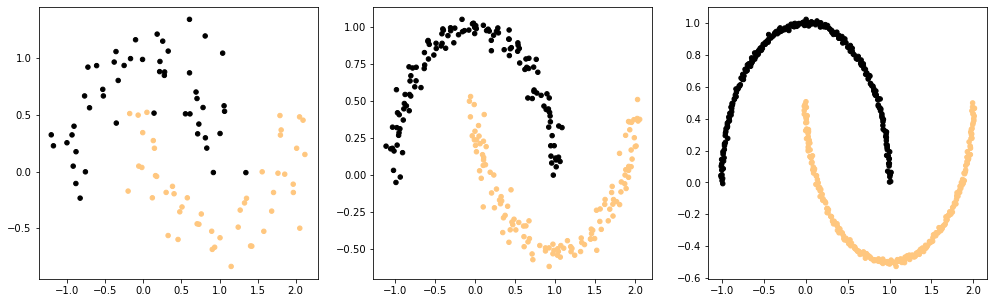

In [2]:
### Data generation
samples = [100, 250, 500]
noise = [0.2, 0.05, 0.01]

for i in range(3):
    plt.rcParams["figure.figsize"] = (17,5)
    plt.subplot(1,3,i+1)
    data, label = make_moons(n_samples=samples[i], noise=noise[i], random_state=0)
    plt.scatter(data[:,0], data[:,1], c=label, cmap="copper",s=20)

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

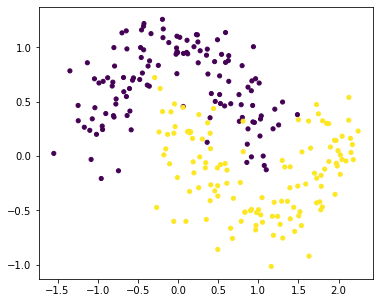

In [3]:
plt.rcParams["figure.figsize"] = (6,5)
data, label = make_moons(n_samples=250, noise=0.2, random_state=0)
plt.scatter(data[:,0], data[:,1], c=label, s=17)
plt.show()

In [4]:
df = pd.DataFrame(dict(feature=data[:,0], target=data[:,1], label=label))
y = df.label
X = df.drop(['label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=.3, random_state=0)

In [5]:
X_train.shape, X_test.shape

((175, 2), (75, 2))

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [6]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [7]:
from tensorflow.keras import models, layers
tf.keras.backend.clear_session()

In [42]:
# Sequential model (1 layer, 5 neurones, input_shape=X.shape[1])
def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(5, activation = 'relu', input_shape=(2,))) #input_dim=2
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    return model

In [43]:
model = initialize_model()

In [44]:
""" Optimizer: SGD(adam), Loss function: Binary classification, Evaluation: Accuracy """
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [46]:
""" model.fit(): with fixed epochs, model.train_on_batch(): single batch training """
history = model.fit(X_train.values, y_train.values, batch_size=15, epochs=100, validation_split=0.2, verbose=0)

In [47]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x16117ab4ac0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.8267571330070496,
   0.7910998463630676,
   0.7574687004089355,
   0.7277704477310181,
   0.702705979347229,
   0.6808394193649292,
   0.6596311330795288,
   0.6420903205871582,
   0.6259787082672119,
   0.6122571229934692,
   0.5992002487182617,
   0.5870054364204407,
   0.576403796672821,
   0.5667921900749207,
   0.5571776032447815,
   0.5488461256027222,
   0.540799617767334,
   0.5330386757850647,
   0.5260682106018066,
   0.5193772315979004,
   0.5132285952568054,
   0.5071886777877808,
   0.5017046332359314,
   0.49638018012046814,
   0.49149224162101746,
   0.4865870773792267,
   0.481880247592926,
   0.4775019586086273,
   0.47352033853530884,
   0.4693317413330078,
   0.4656083285808563,
   0.4619781970977783,
   0.4581730365753174,
   0.4548461139202118,
   0.45137837529182434,
   0.4483

In [48]:
history.history

{'loss': [0.8267571330070496,
  0.7910998463630676,
  0.7574687004089355,
  0.7277704477310181,
  0.702705979347229,
  0.6808394193649292,
  0.6596311330795288,
  0.6420903205871582,
  0.6259787082672119,
  0.6122571229934692,
  0.5992002487182617,
  0.5870054364204407,
  0.576403796672821,
  0.5667921900749207,
  0.5571776032447815,
  0.5488461256027222,
  0.540799617767334,
  0.5330386757850647,
  0.5260682106018066,
  0.5193772315979004,
  0.5132285952568054,
  0.5071886777877808,
  0.5017046332359314,
  0.49638018012046814,
  0.49149224162101746,
  0.4865870773792267,
  0.481880247592926,
  0.4775019586086273,
  0.47352033853530884,
  0.4693317413330078,
  0.4656083285808563,
  0.4619781970977783,
  0.4581730365753174,
  0.4548461139202118,
  0.45137837529182434,
  0.4483945369720459,
  0.4456018805503845,
  0.4425799250602722,
  0.43971559405326843,
  0.4370461404323578,
  0.43461471796035767,
  0.4322091042995453,
  0.4297795295715332,
  0.4273330569267273,
  0.4251972734928131,


❓ Plot the history of the train loss using the following function

In [49]:
def plot_metric(history, metric):
    plt.rcParams["figure.figsize"] = (20,5)
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'b--')
    plt.plot(epochs, val_metrics, 'r-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs"), plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.tight_layout()
    plt.show()

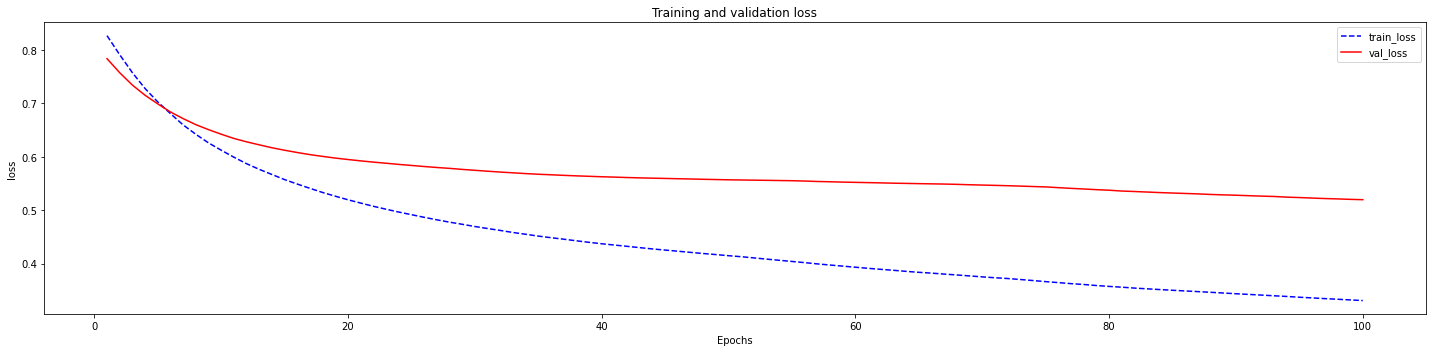

In [50]:
plot_metric(history,"loss")

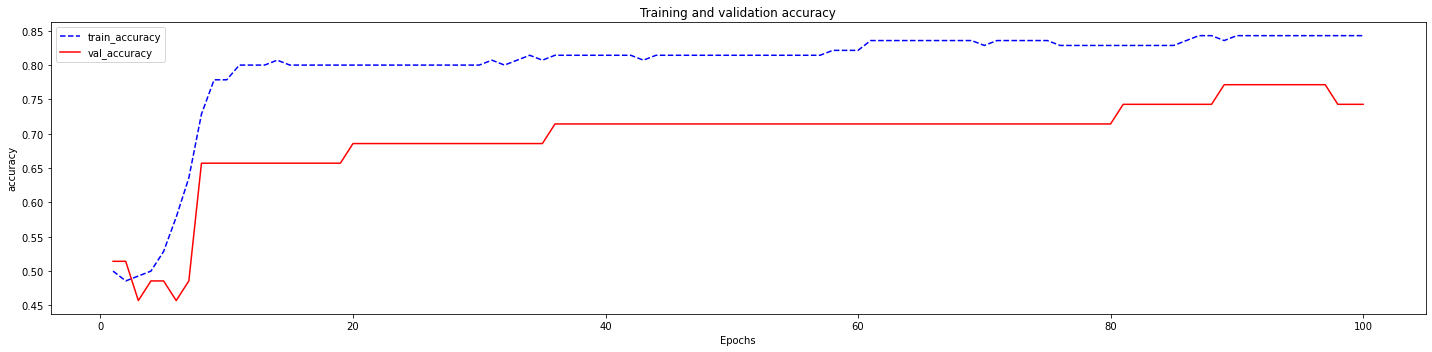

In [51]:
plot_metric(history,"accuracy")

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [52]:
from sklearn import metrics
#y_pred = model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [53]:
print(metrics.confusion_matrix(y_test, y_pred))

[[36  2]
 [11 26]]


In [54]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        38
           1       0.93      0.70      0.80        37

    accuracy                           0.83        75
   macro avg       0.85      0.83      0.82        75
weighted avg       0.85      0.83      0.82        75



You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [55]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', round(score[0], 5), '\nTest accuracy:', round(score[1], 5))

Test score: 0.35258 
Test accuracy: 0.82667


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [56]:
accuracy = round(score[1], 4)
accuracy

0.8267

❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

In [57]:
from utils.plots import plot_decision_regions

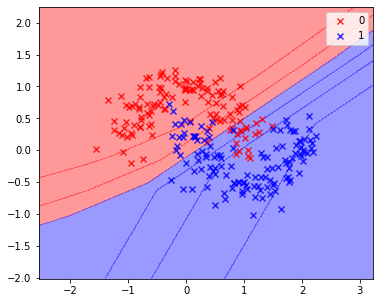

In [58]:
plt.rcParams["figure.figsize"] = (6,5)
plot_decision_regions(X.values, y.values, model)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [59]:
model = initialize_model()
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) #categorical_crossentropy
history = model.fit(X_train.values, y_train.values, batch_size=15, epochs=500, validation_split=0.2, verbose=0)

In [60]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

In [61]:
model.evaluate(x = X_test.values, y = y_test.values, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', round(score[0], 5), '\nTest accuracy:', round(score[1], 5))

Test score: 0.29082 
Test accuracy: 0.82667


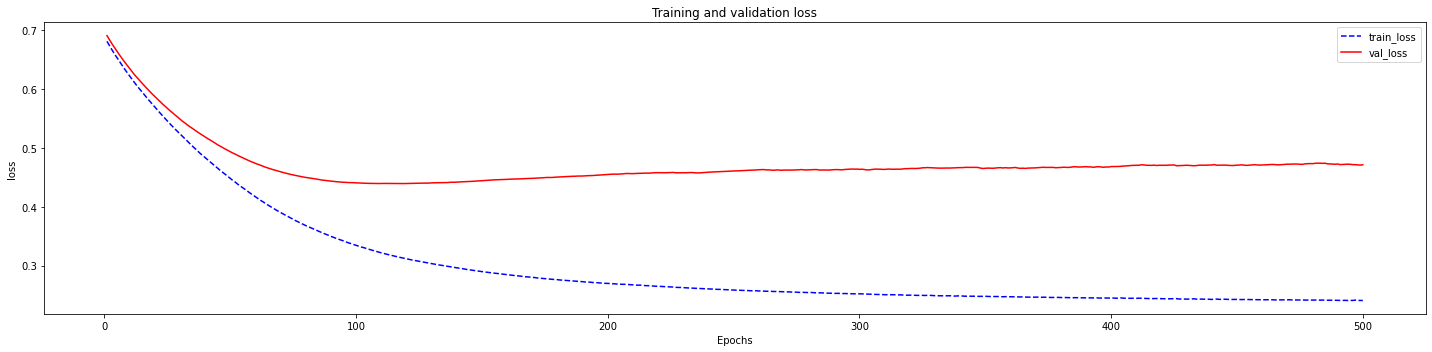

In [62]:
plot_metric(history,"loss")

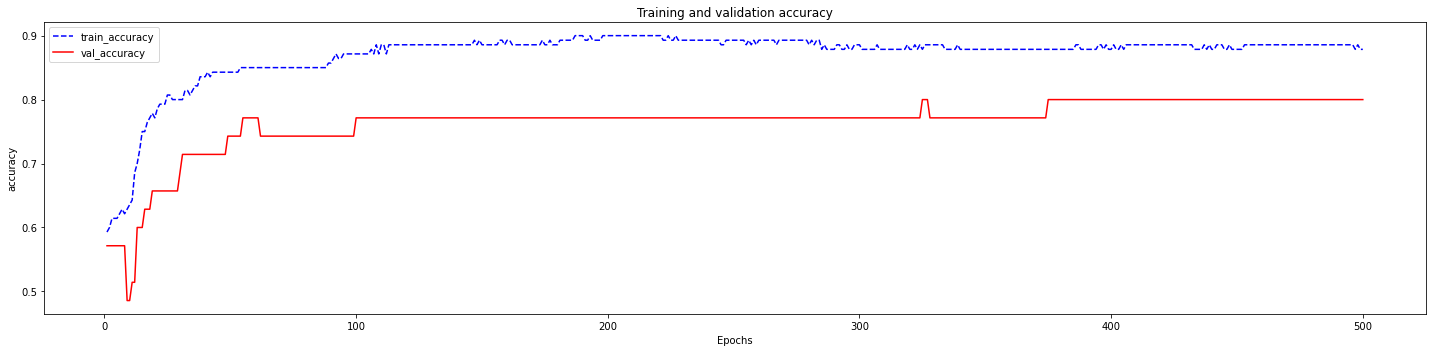

In [63]:
plot_metric(history,"accuracy")

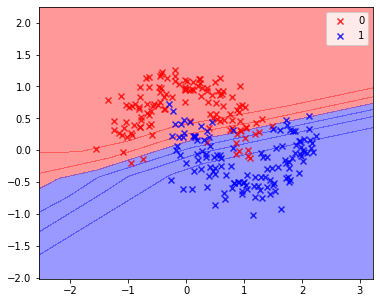

In [64]:
plt.rcParams["figure.figsize"] = (6,5)
plot_decision_regions(X.values, y.values, model)

❓ Did the test accuracy improve?

In [65]:
accuracy = round(score[1], 4)
accuracy

0.8267

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [66]:
""" models.Sequential([Dense(5, activation='relu', input_shape=(2,)), Dense(10, activation='relu'), 
                   Dense(5, activation='relu'), Dense(1, activation='relu')]) """

def initialize_deep_model():
    deep_model = models.Sequential()
    deep_model.add(layers.Dense(20, activation = 'relu', input_shape=(2,)))
    deep_model.add(layers.Dense(10, activation = 'relu'))
    deep_model.add(layers.Dense(5, activation = 'relu'))
    deep_model.add(layers.Dense(1, activation = 'sigmoid'))
    
    return deep_model

In [67]:
deep_model = initialize_deep_model()
deep_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

❓ What is the number of parameters of your new model?

In [68]:
deep_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [69]:
history = deep_model.fit(X_train.values, y_train.values, batch_size=15, epochs=500, validation_split=0.2, verbose=0)

score = deep_model.evaluate(X_test, y_test, verbose=0)
print('Test score:', round(score[0], 5), '\nTest accuracy:', round(score[1], 5))

Test score: 0.18366 
Test accuracy: 0.92


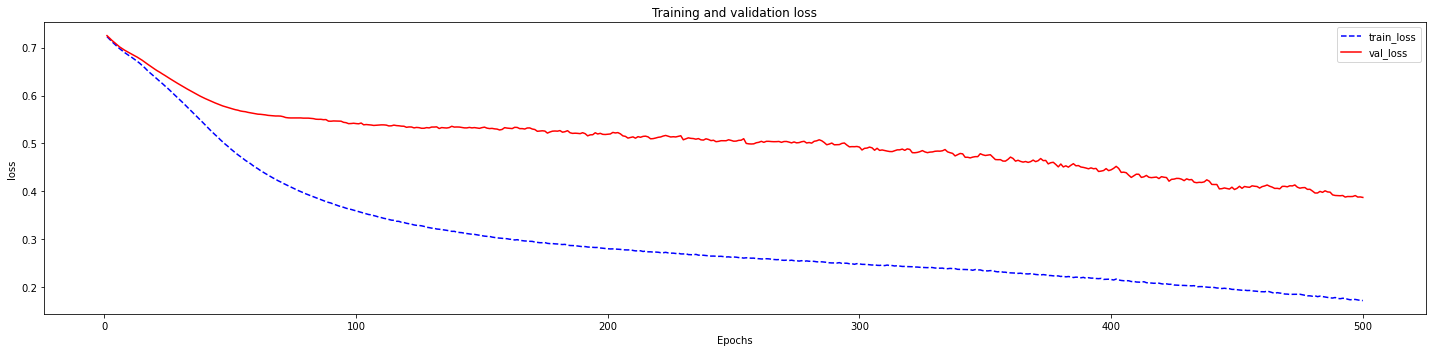

In [70]:
plt.rcParams["figure.figsize"] = (20,5)
#plt.ylim(0, None)
plot_metric(history,"loss")

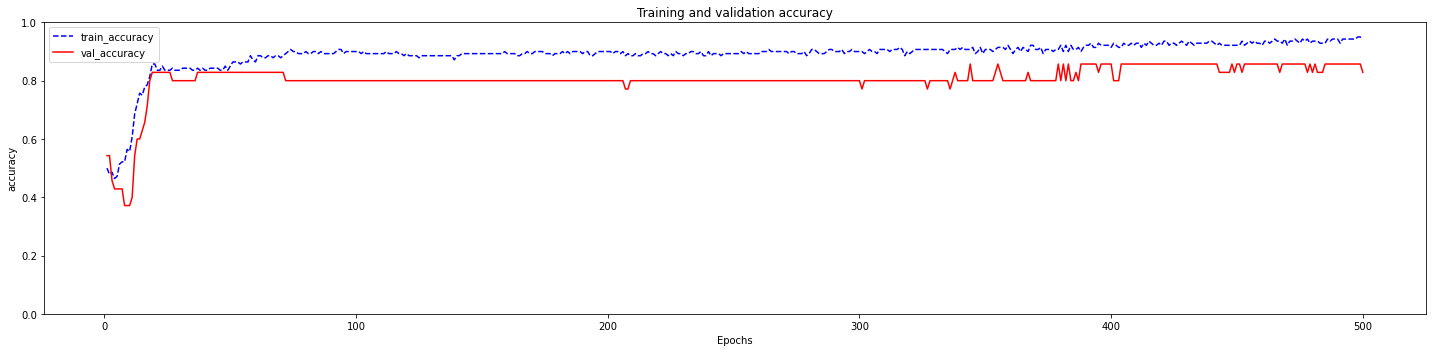

In [71]:
plt.ylim(0, 1)
plot_metric(history,"accuracy")

In [72]:
accuracy_deep = round(score[1], 4)
accuracy_deep

0.92

In [73]:
y_pred = (deep_model.predict(X_test) > 0.5).astype("int32")
print(metrics.confusion_matrix(y_test, y_pred))

[[35  3]
 [ 3 34]]


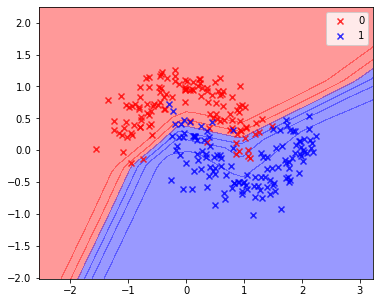

In [74]:
plt.rcParams["figure.figsize"] = (6,5)
plot_decision_regions(X.values, y.values, deep_model)

❓ Do you think we have overfitted on the noise? Check it out below

New moon data with higher noise

In [75]:
new_data, new_label = make_moons(n_samples=250, noise=0.39, random_state=0)
new_df = pd.DataFrame(dict(feature=new_data[:,0], target=new_data[:,1], label=new_label))
new_y = new_df.label
new_X = new_df.drop(['label'], axis=1)

score = deep_model.evaluate(new_X, new_y, verbose=0)
print('Test score:', round(score[0], 5), '\nTest accuracy:', round(score[1], 5))

Test score: 0.41629 
Test accuracy: 0.816


In [76]:
new_y_pred = (deep_model.predict(new_X) > 0.5).astype("int32")
print(metrics.confusion_matrix(new_y, new_y_pred))

[[104  21]
 [ 25 100]]


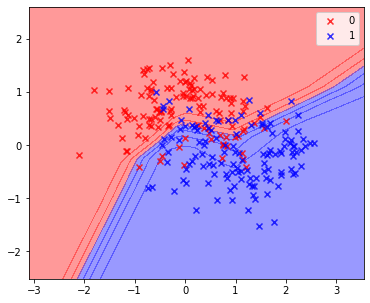

In [77]:
plt.rcParams["figure.figsize"] = (6,5)
plot_decision_regions(new_X.values, new_y.values, deep_model)

New moon data with lower noise

Test score: 0.14063 
Test accuracy: 0.944
[[117   8]
 [  6 119]]


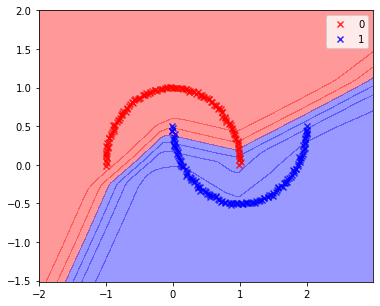

In [78]:
new_data, new_label = make_moons(n_samples=250, noise=0.01, random_state=0)
new_df = pd.DataFrame(dict(feature=new_data[:,0], target=new_data[:,1], label=new_label))
new_y = new_df.label
new_X = new_df.drop(['label'], axis=1)

score = deep_model.evaluate(new_X, new_y, verbose=0)
print('Test score:', round(score[0], 5), '\nTest accuracy:', round(score[1], 5))

new_y_pred = (deep_model.predict(new_X) > 0.5).astype("int32")
print(metrics.confusion_matrix(new_y, new_y_pred))

plt.rcParams["figure.figsize"] = (6,5)
plot_decision_regions(new_X.values, new_y.values, deep_model)